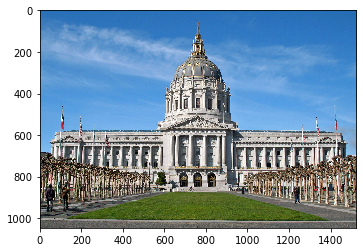

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

#Load in the image
image = cv2.imread('images/city_hall.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
#show the image
plt.imshow(image)

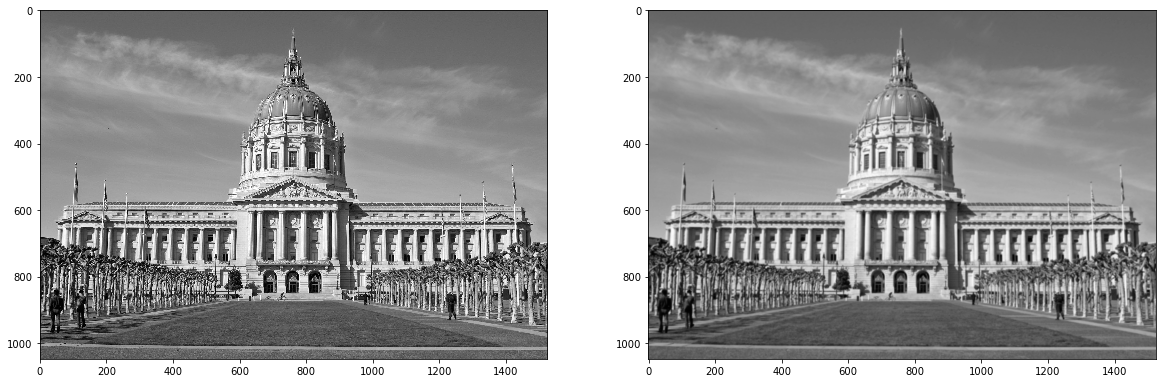

In [6]:
#Convert image to gray scale
gray_image = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

gaussian_blur = cv2.GaussianBlur(gray_image,(9,9),0)

f,(ax1,ax2) = plt.subplots(1,2,figsize=(20,10))
ax1.imshow(gray_image,cmap='gray')
ax2.imshow(gaussian_blur,cmap='gray')

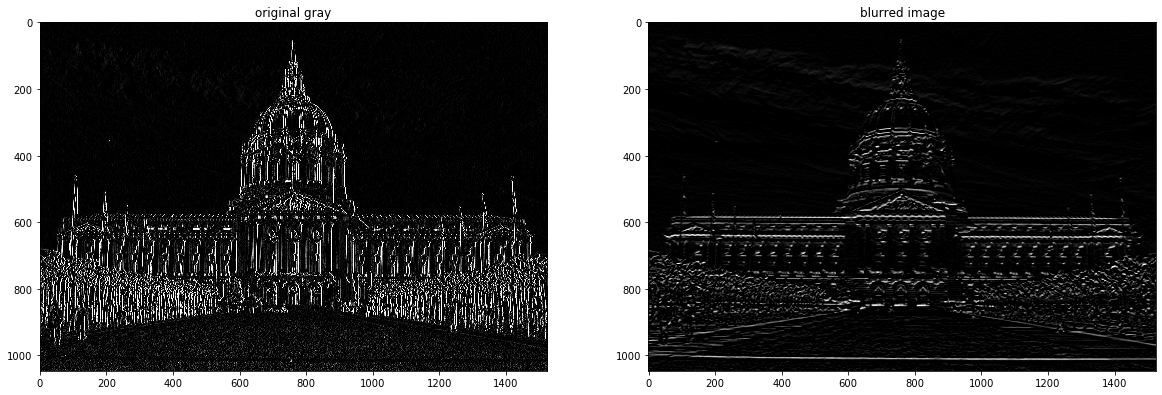

In [9]:
#Apply filter for gradients

# 3x3 sobel filters for edge detection
sobel_x = np.array([[ -1, 0, 1], 
                   [ -2, 0, 2], 
                   [ -1, 0, 1]])


sobel_y = np.array([[ -1, -2, -1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])


# Filter the orginal and blurred grayscale images using filter2D
filtered = cv2.filter2D(gray_image, -1, sobel_x)

filtered_blurred = cv2.filter2D(gaussian_blur, -1, sobel_y)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.set_title('original gray')
ax1.imshow(filtered, cmap='gray')

ax2.set_title('blurred image')
ax2.imshow(filtered_blurred, cmap='gray')

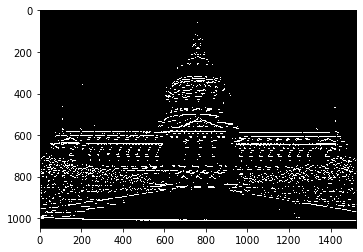

In [10]:
# Create threshold that sets all the filtered pixels to white
# Above a certain threshold

retval, binary_image = cv2.threshold(filtered_blurred, 50, 255, cv2.THRESH_BINARY)

plt.imshow(binary_image, cmap='gray')